In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
from keras.preprocessing.text import Tokenizer
from matplotlib import pyplot 
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, GlobalMaxPool1D, Dropout,GRU

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\darsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\darsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data_path = r'C:\Users\darsh\Desktop\ML\EE 782\ass2\IMDB Dataset.csv'
train=pd.read_csv(data_path)
train.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
y_train = train["sentiment"].map({"negative": 0, "positive": 1})
X = train["review"]

In [4]:
train.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
stopwords_eng = set(stopwords.words("english"))
#Removing the html strips
def strip_html(text):
    p = re.compile(r'<.*?>')
    return p.sub('', text)


def clean_text(text):
    text = text.lower() # convert to lowercase
    text = strip_html(text)
    text = re.sub('\[[^]]*\]', '', text)
    text = re.sub("[^a-z]", " ", text)
    words = [word for word in text.split() if word not in stopwords_eng]
    text = " ".join(words)
    return text

X_train = X.map(clean_text)
X_train.head()

0    one reviewers mentioned watching oz episode ho...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake thinks zombie...
4    petter mattei love time money visually stunnin...
Name: review, dtype: object

In [6]:
num_words = 6000
tokenizer = Tokenizer(num_words=num_words)

tokenizer.fit_on_texts(X_train)

X_train_seq = pd.Series(tokenizer.texts_to_sequences(X_train))
X_train_seq.head()

0    [3, 1897, 916, 55, 2915, 275, 3029, 98, 486, 4...
1    [271, 41, 234, 1228, 2807, 61, 6, 1999, 1430, ...
2    [89, 271, 22, 1003, 6, 725, 1317, 2429, 1088, ...
3    [550, 119, 41, 278, 3174, 1101, 850, 4036, 628...
4    [33, 6, 176, 1974, 1273, 2, 27, 314, 1414, 76,...
dtype: object

In [7]:
X_train_len = X_train_seq.map(lambda ls: len(ls))
X_train_len.describe()

count    50000.000000
mean        99.489800
std         72.206902
min          3.000000
25%         55.000000
50%         75.000000
75%        121.000000
max        967.000000
dtype: float64

Review length: 
Mean 813.93 words (631.115546)


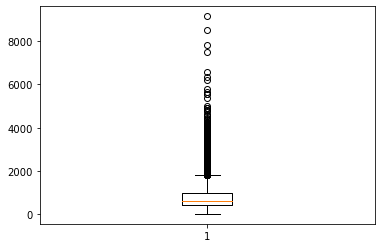

In [8]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X_train]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

In [9]:
from keras.preprocessing.sequence import pad_sequences

X_train_pad = pad_sequences(X_train_seq, maxlen=2000)
X_train_pad

array([[   0,    0,    0, ..., 1065, 3915,  356],
       [   0,    0,    0, ..., 1811,   12,  113],
       [   0,    0,    0, ...,   51,   11,  232],
       ...,
       [   0,    0,    0, ...,  365, 3801, 5760],
       [   0,    0,    0, ..., 1919, 3999,  595],
       [   0,    0,    0, ..., 4263,  652,    1]])

In [10]:
drop=0.5            #factor by whcih LR drops after every epoch
epochs_drop=1.0     #number of epochs after which the LR must decrease
initial_lr=0.01 

#USING 2 DENSE LAYERS

In [12]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, GlobalMaxPool1D, Dropout,GRU

model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim=64))
model.add(LSTM(32, return_sequences=True))
#model.add(LSTM(32))
model.add(GlobalMaxPool1D())

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          384000    
_________________________________________________________________
lstm (LSTM)                  (None, None, 32)          12416     
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 396,961
Trainable params: 396,961
Non-trainable params: 0
__________________________________________________

#USING GRU

In [13]:
model_2 = Sequential()

model_2.add(Embedding(input_dim=num_words, output_dim=64))
model_2.add(GRU(32))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation='sigmoid'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          384000    
_________________________________________________________________
gru (GRU)                    (None, 32)                9408      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 393,441
Trainable params: 393,441
Non-trainable params: 0
_________________________________________________________________


In [14]:
## with 1 GRU
model_2.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [16]:
batch_size = 32
epochs = 10
validation_split = 0.1
model_2.fit(x=X_train_pad, y=y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split)

Epoch 1/10
1407/1407 [==============================] - 997s 709ms/step - loss: 0.3454 - accuracy: 0.8483 - val_loss: 0.2892 - val_accuracy: 0.8850
Epoch 2/10
 634/1407 [============>.................] - ETA: 8:56 - loss: 0.2292 - accuracy: 0.9122

KeyboardInterrupt: 